In [1]:
from sklearn import datasets,decomposition
import matplotlib.pyplot as plt

In [3]:
oliv = datasets.fetch_olivetti_faces()

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
oliv['images'].shape # It has 400 images as rows where each image is of 64x64 pixels

(400, 64, 64)

In [6]:
oliv['data'].shape # It it has 400 images as row but pixels of each image is flattened in single row of 4096 columns

(400, 4096)

In [18]:
# In case of images all of its pixels are features(4096 here)
# we will work with just 64 images
#First we will create a figure of size 64
#then we fill images

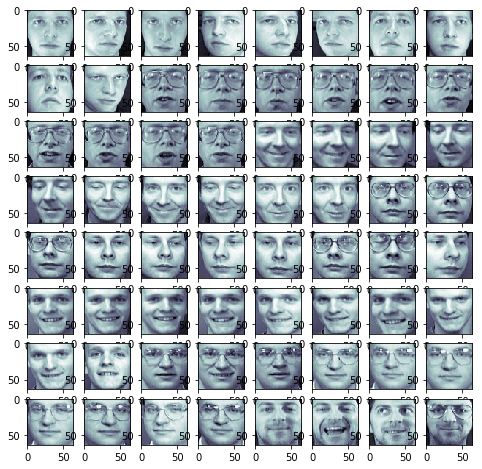

In [11]:
fig = plt.figure(figsize = [8,8])
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) #this devide figure in 8 col and rows and start to fill at i+1 position(i+1 ,because i start from 0)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone) #this is used to fill images at each of 64 subplots,cmap = color map
plt.show()

In [12]:
x = oliv.data
y = oliv.target

In [13]:
pca = decomposition.PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# Finding min no. of features we need 
total = sum(pca.explained_variance_)
current_var = 0
k = 0
while current_var/total < 0.95 : # we want 95% variance
    current_var += pca.explained_variance_[k]
    k += 1
k

123

In [20]:
pca = decomposition.PCA(n_components = k , whiten = True) # In images 'Whiten' will kind of scale the data and is sometime useful
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [21]:
# so we reduced out features to 123 from 4096 while retaining 95% of data

In [22]:
# Now we try to get original 400x4096 data from our new 400x123 data

In [23]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [24]:
# we will get it back to image form of 400x64x64
x_approx_image = x_approx.reshape((400,64,64))

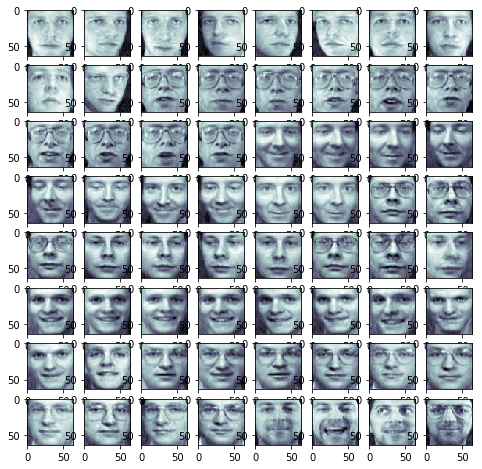

In [25]:
fig = plt.figure(figsize = [8,8])
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) #this devide figure in 8 col and rows and start to fill at i+1 position(i+1 ,because i start from 0)
    ax.imshow(x_approx_image[i] , cmap = plt.cm.bone) #this is used to fill images at each of 64 subplots,cmap = color map
plt.show()

In [26]:
# Obviously image quality decreased a bit but it is nothing compared to speed we gain